In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

bs = 16

In [5]:
imagefiles = get_image_files('./images/train')
imagefiles[:5]

[PosixPath('images/train/board1_green-oval-hashed-single.png'),
 PosixPath('images/train/board2_purple-oval-hashed-triple.png'),
 PosixPath('images/train/board1_green-oval-filled-single.png'),
 PosixPath('images/train/board3_purple-oval-filled-triple.png'),
 PosixPath('images/train/board8_green-oval-filled-double.png')]

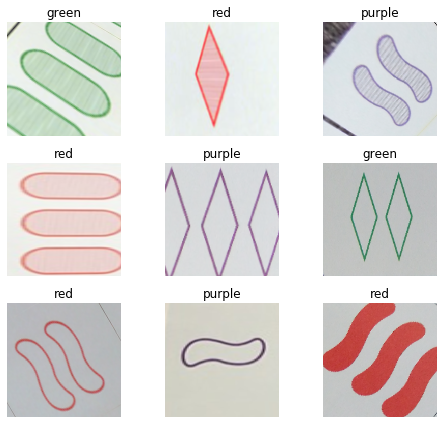

In [7]:
label_pattern = r'/board\d+_(red|green|purple)-(diamond|oval|squiggle)-(empty|filled|hashed)-(single|double|triple).png$'

# Make sure we get the same validation set while we tune the other parameters
np.random.seed(42)
bunch = ImageDataBunch.from_name_re('.', imagefiles, label_pattern, ds_tfms=get_transforms(max_zoom=1.3, flip_vert=True, max_rotate=90), size=224, bs=bs, resize_method=ResizeMethod.SQUISH).normalize(imagenet_stats)
bunch.show_batch(rows=3, figsize=(7,6))

In [8]:
np.random.seed(42)
learn = cnn_learner(bunch, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.258683,1.504484,0.600000,00:04
1,2.047814,1.597518,0.700000,00:00
2,1.736782,1.225135,0.700000,00:00
3,1.519839,1.059842,0.300000,00:00


In [9]:
learn.save('stage-1-color')

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(bunch.valid_ds)==len(losses)==len(idxs)

True

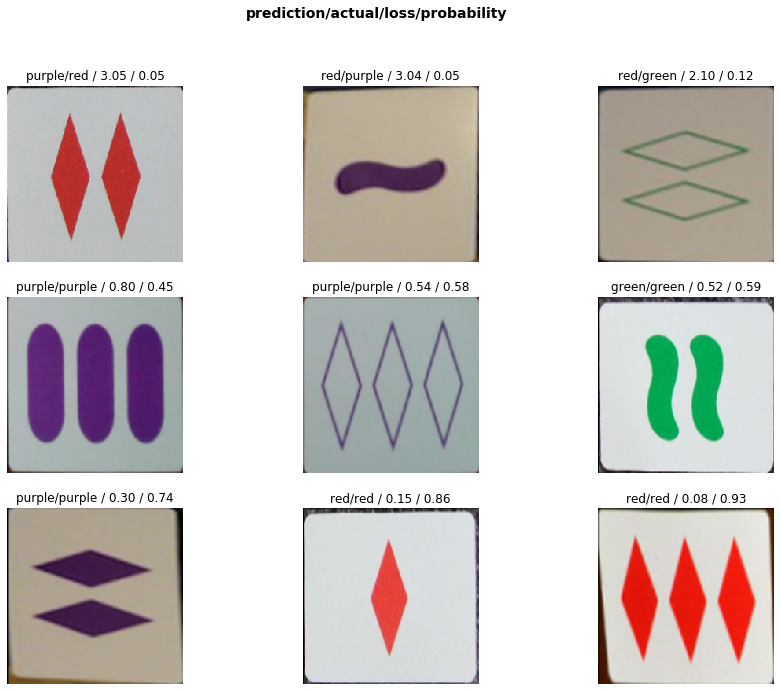

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


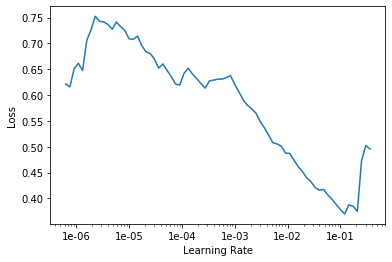

In [13]:
learn.recorder.plot()

In [14]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-3, 1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.475346,49.370026,0.800000,00:01
1,3.905569,1575887.250000,0.600000,00:01
2,4.545205,6003336.000000,0.600000,00:01
3,5.086685,62966.425781,0.600000,00:01


In [ ]:
learn = cnn_learner(bunch, models.resnet50, metrics=error_rate)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-2,1e-1))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)